In [56]:
#imports
import os
import sys
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

seed=7
%matplotlib inline
dataframe=pd.read_csv('Encoded.csv')
print(dataframe.shape)
dataframe.head()

(818, 18)


,Unnamed: 0,condition_id,patient_id,gender,education,employment,number_of_daily_contacts,type_of_resistance,outcome,social_risk_factors,comorbidity,qure_consolidation,qure_fibrosis,qure_peffusion,lung_localization,country,BMI,Age_Group
0,0,003e095a-db07-4abe-b07d-3050fc77f925,79bf51ab-76ea-4bab-a3ab-bef40f1b618e,1,4,5,2.0,3,0,6,3,0,0,0,0,2,1,0
1,2,00c3e86c-ded3-474f-a931-c598e892c474,0a0cecd4-eb29-476d-9645-f2d83c5bdc79,0,4,2,1.0,3,0,0,5,1,1,0,0,4,3,0
2,6,01028dc8-e2c8-4d68-8294-f4422f36a9cd,299e91a6-ab5d-4a35-83c3-8e4f83952d13,1,4,5,1.0,0,0,3,3,1,0,0,0,2,0,0
3,7,01374588-24d4-445a-a01d-4be34e25dc75,0ff6be85-243b-4612-a932-d709b3809632,0,4,5,2.0,3,0,6,3,1,0,0,0,2,1,3
4,11,01877e4a-b974-4850-ad08-e365a2bd60f8,87ff6bb5-7908-486a-9067-149105b3c36b,1,2,1,0.0,0,0,0,0,0,0,1,0,1,0,0


In [57]:
df=dataframe.drop(['Unnamed: 0','condition_id','patient_id'], axis=1)
print(df.shape)

(818, 15)


In [58]:
df.insert(0, 'outcome', df.pop('outcome'))

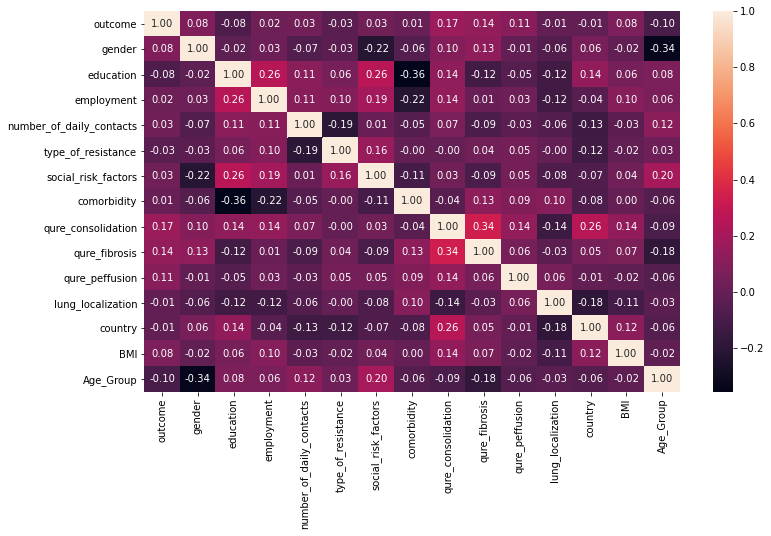

In [59]:
fig, ax = plt.subplots(figsize = (12, 7)) 
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [60]:
#PCA and t-SNE plots to check
print("--------------------------------------- Running PCA ---------------------------------------")
#1. Principal Component Analysis (PCA)
#initialize
pca = PCA(n_components=2, random_state=seed)
#fit
pca_result = pca.fit_transform(df.iloc[:, 3:])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#create a DataFrame that will have the principal component values for all samples
principal_df_pca = pd.DataFrame(data=pca_result, columns=['principal component 1', 'principal component 2'])
principal_df_pca['Outcome'] = df.iloc[:,0:1].values  

--------------------------------------- Running PCA ---------------------------------------
Explained variation per principal component: [0.35353945 0.18476081]


In [61]:
print("--------------------------------------- Running t-SNE ---------------------------------------")
#2. T-Distributed Stochastic Neighbouring Entities
#initialize
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=10000, random_state=seed)
#fit
tsne_result = tsne.fit_transform(df.iloc[:, 3:])

principal_df_tsne = pd.DataFrame(data=tsne_result, columns=['dimension 1', 'dimension 2'])
principal_df_tsne['Outcome'] = df.iloc[:,0:1].values

--------------------------------------- Running t-SNE ---------------------------------------
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 818 samples in 0.001s...
[t-SNE] Computed neighbors for 818 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 818 / 818
[t-SNE] Mean sigma: 1.803272
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.911133
[t-SNE] KL divergence after 1300 iterations: 0.495555


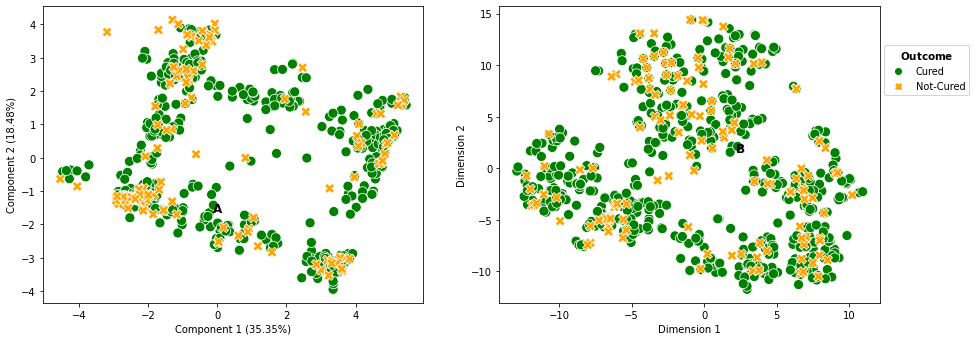

In [62]:
# Plot PCA and t-SNE together

fig = plt.figure(figsize=(15,12)) 
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2)


sns.set_palette(sns.color_palette(["green", "orange"]))
markers = {0: "o", 1: "X"}

#pca plot
sns.scatterplot(data=principal_df_pca, ax=ax1, x="principal component 1", y="principal component 2",
                hue="Outcome", style="Outcome", markers=markers, legend=None, s=100)
#t-sne plot
sns.scatterplot(data=principal_df_tsne, ax=ax2, x="dimension 1", y="dimension 2",
                hue="Outcome", style="Outcome", markers=markers, legend=None, s=100)

#set labels
ax1.set(xlabel = "Component 1 (%0.2f" % (pca.explained_variance_ratio_[0]*100)+ "%)", 
        ylabel = "Component 2 (%0.2f" % (pca.explained_variance_ratio_[1]*100)+ "%)")
ax2.set(xlabel="Dimension 1", 
        ylabel="Dimension 2")

ax1.text(0.0, -1.64, ("A"), wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')
#ax2.text(22.0, -43.265, ("B"), wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')
ax2.text(2.5, 1.560, ("B"), wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')


        
custom_legend = [Line2D([], [], marker='o', color='green', linewidth=10, linestyle='None'),
                 Line2D([], [], marker='X', color='orange', linewidth=10, linestyle='None')]

l=plt.legend(custom_legend,['Cured', 'Not-Cured'], title="$\\bf{Outcome}$", loc='best', bbox_to_anchor=(0.999, 0.8848), fontsize=9.8)
l.get_title().set_fontsize(10.3)

plt.show()
# fig.set_rasterized(True) 
plt.close()






###  Machine Learning


Steps:
1. **Split:** 80/20 split into training and testing sets.


2. **k-Fold Cross Validation:** use the 80% training data to do a 5-fold cross validation on each model, report the test results: 
   - i. accuracy (average and standard deviation)
   - ii. precision (average and standard deviation)
   - iii. recall (average and standard deviation)
   - iv. f1 (average and standard deviation)
   - v. confusion matrix


3. **Best Estimates:** find the best parameters for each model - use randomised grid search.


4. **Retrain:** use the 80% training data to retrain each optimised model.


5. **Test:** use the 20% testing data to test each optimised model, add confidence intervals (bootstrap).


6. **Important Features:** find the best 10 features for each optimised model.

In [63]:
#Create independent and Dependent Features
LABELS = ["Cured", "Not cured"]
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["outcome"]]
# Store the variable we are predicting 
target = "outcome"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(818, 14)
(818,)


Text(0, 0.5, 'Frequency')

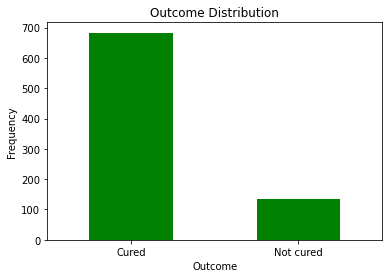

In [64]:
count_classes = pd.value_counts(df['outcome'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Outcome Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Outcome")

plt.ylabel("Frequency")

In [65]:
df.head()

,outcome,gender,education,employment,number_of_daily_contacts,type_of_resistance,social_risk_factors,comorbidity,qure_consolidation,qure_fibrosis,qure_peffusion,lung_localization,country,BMI,Age_Group
0,0,1,4,5,2.0,3,6,3,0,0,0,0,2,1,0
1,0,0,4,2,1.0,3,0,5,1,1,0,0,4,3,0
2,0,1,4,5,1.0,0,3,3,1,0,0,0,2,0,0
3,0,0,4,5,2.0,3,6,3,1,0,0,0,2,1,3
4,0,1,2,1,0.0,0,0,0,0,0,1,0,1,0,0


In [66]:
## Get the Fraud and the normal dataset 

Cured = df[df['outcome']==0]

Not_cured = df[df['outcome']==1]

In [67]:
print(Cured.shape, Not_cured.shape)

(683, 15) (135, 15)


In [68]:
from imblearn.combine import SMOTETomek

In [69]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_resampled,y_resampled=smk.fit_sample(X,Y)
print(X_resampled.shape,y_resampled.shape)

(1354, 14) (1354,)


In [70]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({0: 683, 1: 135})
Resampled dataset shape Counter({0: 677, 1: 677})


In [71]:
print("--------------------------------------- Running t-SNE_original ---------------------------------------")
#2. T-Distributed Stochastic Neighbouring Entities
#initialize
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=10000, random_state=seed)
#fit
tsne_result = tsne.fit_transform(df.iloc[:, 1:])

principal_df_tsne_original = pd.DataFrame(data=tsne_result, columns=['dimension 1', 'dimension 2'])
principal_df_tsne_original['Outcome'] = df.iloc[:,0:1].values

--------------------------------------- Running t-SNE_original ---------------------------------------
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 818 samples in 0.001s...
[t-SNE] Computed neighbors for 818 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 818 / 818
[t-SNE] Mean sigma: 1.934547
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.416668
[t-SNE] KL divergence after 1950 iterations: 0.550551


In [72]:
print("--------------------------------------- Running t-SNE_resampling ---------------------------------------")
#2. T-Distributed Stochastic Neighbouring Entities
#initialize
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=10000, random_state=seed)
#fit
tsne_result = tsne.fit_transform(X_resampled)

principal_df_tsne_resampling = pd.DataFrame(data=tsne_result, columns=['dimension 1', 'dimension 2'])
principal_df_tsne_resampling['Outcome'] = y_resampled.values

--------------------------------------- Running t-SNE_resampling ---------------------------------------
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1354 samples in 0.002s...
[t-SNE] Computed neighbors for 1354 samples in 0.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1354
[t-SNE] Computed conditional probabilities for sample 1354 / 1354
[t-SNE] Mean sigma: 1.611280
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.851715
[t-SNE] KL divergence after 1700 iterations: 0.555118


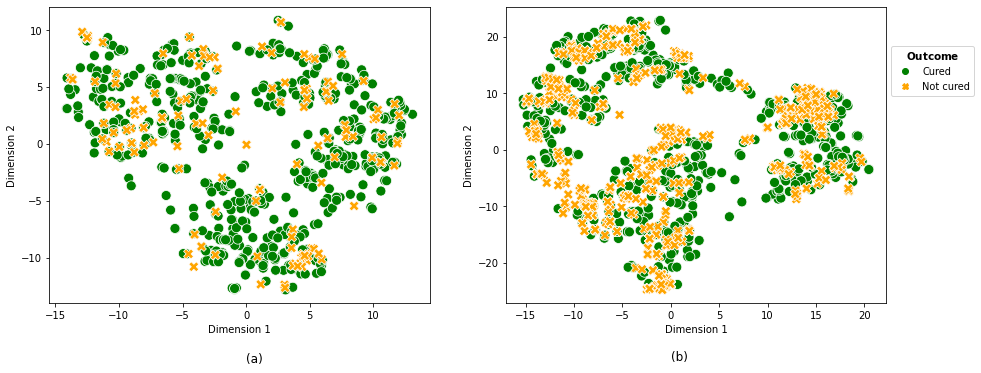

In [73]:
# Plot PCA and t-SNE together
# Here we create a figure instance, and two subplots
fig = plt.figure(figsize=(15,12)) # width x height
ax1 = fig.add_subplot(2, 2, 1) # row, column, position
ax2 = fig.add_subplot(2, 2, 2)

# We use ax parameter to tell seaborn which subplot to use for this plot
sns.set_palette(sns.color_palette(["green", "orange"]))
markers = {0.0: "o", 1.0: "X"}

#pca plot
sns.scatterplot(data=principal_df_tsne_original, ax=ax1,x="dimension 1", y="dimension 2",
                hue="Outcome", style="Outcome", markers=markers, legend=None, s=100)
#t-sne plot
sns.scatterplot(data=principal_df_tsne_resampling, ax=ax2, x="dimension 1", y="dimension 2",
                hue="Outcome", style="Outcome", markers=markers, legend=None, s=100)

#set labels
ax1.set(xlabel="Dimension 1", 
        ylabel="Dimension 2")
ax2.set(xlabel="Dimension 1", 
        ylabel="Dimension 2")

ax1.text(0, -19.265, ("(a)"), wrap=True, horizontalalignment='left', fontsize=12)
ax2.text(0, -37.265, ("(b)"), wrap=True, horizontalalignment='left', fontsize=12)
# ax2.text(2.5, 1.560, ("B"), wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')

#set titles
#ax1.set(title="PCA for two M. tb Phenotypes")
#ax2.set(title="t-SNE for two M. tb Phenotypes")

#fig.suptitle('Data Visualization of Dinucleotide Frequencies')
        
custom_legend = [Line2D([], [], marker='o', color='green', linewidth=10, linestyle='None'),
                 Line2D([], [], marker='X', color='orange', linewidth=10, linestyle='None')]
#fig.legend(custom_legend, ['Susceptible', 'Resistant'], title="Phenotype", loc='upper right',fontsize=12, bbox_to_anchor=(0.11, 0.485), prop={"size": 12})
l=plt.legend(custom_legend, ['Cured', 'Not cured'], title="$\\bf{Outcome}$", loc='best', bbox_to_anchor=(0.999, 0.8848), fontsize=9.8)
l.get_title().set_fontsize(10.3)

plt.show()
fig.set_rasterized(True) #preserves the alpha transparency value (fully opaque: alpha=1 (default); fully transparent: alpha=1)
#fig.savefig("./plots/PCA_T-SNE-Variant-RM.eps", format='eps',  bbox_inches="tight")
#fig.savefig("./plots/PCA_T-SNE-Variant-RM.pdf", format='pdf',  bbox_inches="tight")
plt.close()

## CP-Decomposition 

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
features_list = ['gender', 'education', 'number_of_daily_contacts', 'type_of_resistance',
                'social_risk_factors', 'comorbidity', 'qure_consolidation', 'qure_fibrosis',
                'qure_peffusion','lung_localization','country','BMI','Age_Group']
s_features = []
le = LabelEncoder()

samples_mat = []
for feature in features_list:
    col = le.fit_transform(X_resampled[feature].values)
    samples_mat.append(col)
    s_features.append(len(le.classes_))
samples_mat = np.array(samples_mat).T
print(samples_mat.shape)

(1354, 13)


In [76]:
X_resampled

,gender,education,employment,number_of_daily_contacts,type_of_resistance,social_risk_factors,comorbidity,qure_consolidation,qure_fibrosis,qure_peffusion,lung_localization,country,BMI,Age_Group
0,1,4,5,2.00000,3,6,3,0,0,0,0,2,1,0
1,0,4,2,1.00000,3,0,5,1,1,0,0,4,3,0
2,1,4,5,1.00000,0,3,3,1,0,0,0,2,0,0
3,0,4,5,2.00000,3,6,3,1,0,0,0,2,1,3
4,1,2,1,0.00000,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,4,5,2.00000,2,6,3,1,1,0,0,2,1,1
1350,0,3,0,1.00000,4,6,3,0,0,0,0,2,3,1
1351,1,3,5,3.00000,4,1,3,0,0,0,0,1,0,0
1352,0,1,5,4.84153,0,6,4,0,0,0,0,0,0,2


In [77]:
samples = {}
for i, id in enumerate(X_resampled['gender'].values):
    samples[id] = samples_mat[i]

In [78]:
samples

{1: array([  1,   4, 101,   3,   6,   3,   0,   0,   0,   0,   2,   1,   0]),
 0: array([  0,   1, 269,   0,   6,   4,   0,   0,   0,   0,   0,   0,   2])}

In [79]:
X_resampled = X_resampled.iloc[: , 1:]
data = X_resampled.to_numpy()
#data = data.reshape((-1, 1, len(s_features)))
target = y_resampled.to_numpy()
print('Mean target: {}'.format(np.mean(target==1)))

Mean target: 0.5


In [80]:
len(s_features)

13

In [81]:
# split to pos/neg samples
positive_idx = np.where(target==1)[0]
negative_idx = np.where(target!=1)[0]

In [82]:
from sklearn.model_selection import train_test_split
pos_idx_tr, pos_idx_te = train_test_split(positive_idx, random_state=42, test_size=0.5)
neg_idx_tr, neg_idx_te = train_test_split(negative_idx, random_state=42, train_size=len(pos_idx_tr))

In [83]:
def build_matrix(pos_idx, neg_idx):
    rows_feature = []
    for idx in list(pos_idx) + list(neg_idx):
        #u = data[idx]
        # values should be 1-based 
        #rows_feature.append(samples[u].to_numpy() + 1)
        # u and i already 1-based
        rows_feature.append(data[idx]+ 1)
    X = np.hstack(map(np.array,[rows_feature]))
    Y = np.zeros(len(pos_idx) + len(neg_idx))
    Y[:len(pos_idx)] = 1
    perm = np.random.permutation(X.shape[0])
    return X[perm], Y[perm]

In [84]:
X_tr, Y_tr = build_matrix(pos_idx_tr, neg_idx_tr)
X_te, Y_te = build_matrix(pos_idx_te, neg_idx_te)

/home/mashjunior/anaconda3/envs/james_tensor/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


In [85]:
s_features

[2, 5, 283, 5, 9, 6, 2, 2, 2, 2, 5, 4, 4]

In [86]:
#### The dataset was obtained after the same preprocessing of the original MovieLens 100k dataset performed in Exponential Machines (Novikov et al. 2016)
#### to allow for direct comparison.
#### Code adapted from Exponential Machines (2016) Novikov et al.
#### url:https://github.com/Bihaqo/exp-machines
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from CP_Machine import CP_Machine,simple_batcher
import time

In [87]:
num_features=len(s_features)
x_train, x_test = X_tr, X_te
y_train, y_test = Y_tr, Y_te

In [88]:
x_train.shape

(676, 13)

In [89]:
y_train.shape

(676,)

In [90]:
##### Logistic Regression #####
oh = OneHotEncoder()
oh.fit(np.vstack((x_train, x_test))-1)
X_tr_sp = oh.transform(x_train-1)
X_te_sp = oh.transform(x_test-1)
logreg = LogisticRegression()
logreg.fit(X_tr_sp, y_train)
y_pred = logreg.predict_proba(X_te_sp)[:, 1]
print(roc_auc_score(y_test, y_pred))

0.8784251790360336


In [91]:
##### CP_Machine #####


cp_rank = 30
num_features = len(s_features)
w_cores = [None] * num_features
begin_feature = [0] + list(np.cumsum(s_features)) #### where each feature begins in the big d vector

coef = logreg.coef_[0]
intercept = logreg.intercept_[0]

In [92]:
for i in range(num_features):
    local_dim = s_features[i]
 
    tmp = np.zeros((local_dim+1,cp_rank))
    tmp[0,:num_features]=1
    tmp[0,i]=intercept/num_features   
    tmp[1:s_features[i]+1,i]= coef[begin_feature[i]:begin_feature[i]+s_features[i]]

    w_cores[i] = tmp.astype(np.float32)

In [93]:
epoch_hist=[]

#### init_std=0.001, rank=30, reg=0.00005, expreg=3.6,  auc=0.7863

model = CP_Machine(rank=cp_rank, s_features=s_features, init_std=0.001, reg=0.00005, exp_reg=3.6)
model.init_from_cores(w_cores)
model.build_graph()
model.initialize_session()

In [94]:
start=time.time()
for epoch in range(200):
    loss_hist = []
    penalty_hist = []
    for x, y in simple_batcher(x_train, y_train, 16):
        fd = {model.X: x, model.Y: 2*y-1}
        run_ops = [model.trainer, model.outputs, model.loss, model.penalty, model.G]

        _, outs, batch_loss, penalty,weights = model.session.run(run_ops, fd)

        loss_hist.append(batch_loss)
        penalty_hist.append(penalty)
    epoch_train_loss = np.mean(loss_hist)
    epoch_train_pen = np.mean(penalty_hist)
    
#    epoch_stats = {'epoch': epoch,'train_logloss': float(epoch_train_loss)}
    epoch_stats = {'train_MSE': float(epoch_train_loss)}

     # test phase
#    if epoch%1==0 and epoch>0:
    fd = {model.X: x_test, model.Y: 2*y_test-1}
    run_ops = [model.outputs, model.loss, model.penalty, model.penalized_loss]

    outs, raw_loss, raw_penalty, loss = model.session.run(run_ops, fd)
    epoch_test_loss = roc_auc_score(y_test, outs)
    epoch_stats['test_auc'] = float(epoch_test_loss),
    #epoch_stats['penalty'] = float(raw_penalty)
    print('{}: te_auc: {:.4f}'.format(epoch, epoch_test_loss))

    epoch_hist.append(epoch_stats)
end=time.time()

0: te_auc: 0.4170
1: te_auc: 0.4458
2: te_auc: 0.4697
3: te_auc: 0.4928
4: te_auc: 0.5162
5: te_auc: 0.5417
6: te_auc: 0.5734
7: te_auc: 0.6082
8: te_auc: 0.6458
9: te_auc: 0.6773
10: te_auc: 0.7014
11: te_auc: 0.7213
12: te_auc: 0.7410
13: te_auc: 0.7591
14: te_auc: 0.7742
15: te_auc: 0.7902
16: te_auc: 0.8031
17: te_auc: 0.8121
18: te_auc: 0.8180
19: te_auc: 0.8214
20: te_auc: 0.8245
21: te_auc: 0.8263
22: te_auc: 0.8279
23: te_auc: 0.8287
24: te_auc: 0.8302
25: te_auc: 0.8321
26: te_auc: 0.8330
27: te_auc: 0.8337
28: te_auc: 0.8339
29: te_auc: 0.8342
30: te_auc: 0.8353
31: te_auc: 0.8364
32: te_auc: 0.8370
33: te_auc: 0.8376
34: te_auc: 0.8384
35: te_auc: 0.8391
36: te_auc: 0.8404
37: te_auc: 0.8406
38: te_auc: 0.8412
39: te_auc: 0.8415
40: te_auc: 0.8420
41: te_auc: 0.8423
42: te_auc: 0.8430
43: te_auc: 0.8435
44: te_auc: 0.8439
45: te_auc: 0.8444
46: te_auc: 0.8452
47: te_auc: 0.8453
48: te_auc: 0.8459
49: te_auc: 0.8465
50: te_auc: 0.8469
51: te_auc: 0.8475
52: te_auc: 0.8476
53:

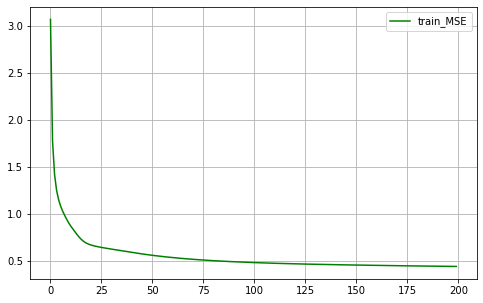

Training Time:45.483903646469116


In [95]:
pd.DataFrame(epoch_hist).plot(figsize=(8, 5))
plt.grid(True)
plt.show()
print('Training Time:{}'.format(end-start))

In [98]:
#%pylab inline
#plot([x['epoch'] for x in epoch_hist if 'test_auc' in x], [x['test_auc'] for x in epoch_hist if 'test_auc' in x])
#grid()
#ylim(0.5, 0.9)
#xlabel('epoch')
#ylabel('test auc')

**Insert confident interval analysis**

## TensorTrain from Exponential(Factorization) Machines 

In [99]:
from TFExpMachine import TFExpMachine, simple_batcher

### estimate wight tensor cores 

In [100]:
target_rank = 10

num_features = len(s_features)
w_cores = [None] * num_features

coef = logreg.coef_[0]
intercept = logreg.intercept_[0]

In [101]:
# see paper for details about initialization
begin_feature = [0] + list(np.cumsum(s_features))
for i in range(num_features):
    n_factors = s_features[i]
    if i == 0:
        tmp = np.zeros((n_factors+1, 1, target_rank))
        for local_j, global_j in enumerate([-1] + list(range(begin_feature[i], s_features[i]))):
            if local_j==0:
                tmp[local_j,:1,:2] = [1, 0]
            else:
                tmp[local_j,:1,:2] = [0, coef[global_j]]
        w_cores[i] = tmp.astype(np.float32)
            
    elif i == num_features-1:
        tmp = np.zeros((n_factors+1, target_rank, 1))
        for local_j, global_j in enumerate([-1] + list(range(begin_feature[i], s_features[i]))):
            if local_j==0:
                tmp[local_j,:2,:1] = np.array([[intercept], [1]])
            else:
                tmp[local_j,:2,:1] = [[coef[global_j]], [0]]
        w_cores[i] = tmp.astype(np.float32)
            
    else:
        tmp = np.zeros((n_factors+1, target_rank, target_rank))
        for local_j, global_j in enumerate([-1] + list(range(begin_feature[i], s_features[i]))):
            if local_j==0:
                tmp[local_j,:2,:2] = np.eye(2)
            else:
                tmp[local_j,:2,:2] = [[0, coef[global_j]], [0,0]]
        w_cores[i] = tmp.astype(np.float32)

### initialize model 

In [102]:
model.destroy()
model = TFExpMachine(rank=target_rank, s_features=s_features, init_std=0.001, reg=0.012, exp_reg=1.8)
model.init_from_cores(w_cores)
model.build_graph()
model.initialize_session()

In [103]:
epoch_hist = []
for epoch in range(200):
    # train phase
    loss_hist = []
    penalty_hist = []
    for x, y in simple_batcher(x_train, y_train, 16):
        fd = {model.X: x, model.Y: 2*y-1}
        run_ops = [model.trainer, model.outputs, model.loss, model.penalty]
        _, outs, batch_loss, penalty = model.session.run(run_ops, fd)
        loss_hist.append(batch_loss)
        penalty_hist.append(penalty)
    epoch_train_loss = np.mean(loss_hist)
    epoch_train_pen = np.mean(penalty_hist)
    
    epoch_stats = {
        'epoch': epoch,
        'train_logloss': float(epoch_train_loss)
    }
    
    # test phase
    if epoch%2==0 and epoch>0:
        fd = {model.X: x_test, model.Y: 2*y_test-1}
        run_ops = [model.outputs, model.loss, model.penalty, model.penalized_loss]
        outs, raw_loss, raw_penalty, loss = model.session.run(run_ops, fd)
        epoch_test_loss = roc_auc_score(y_test, outs)
        epoch_stats['test_auc'] = float(epoch_test_loss),
        epoch_stats['penalty'] = float(raw_penalty)
        print('{}: te_auc: {:.4f}'.format(epoch, epoch_test_loss))
    epoch_hist.append(epoch_stats)

2: te_auc: 0.7330
4: te_auc: 0.7609
6: te_auc: 0.7862
8: te_auc: 0.8050
10: te_auc: 0.8179
12: te_auc: 0.8212
14: te_auc: 0.8235
16: te_auc: 0.8260
18: te_auc: 0.8270
20: te_auc: 0.8281
22: te_auc: 0.8301
24: te_auc: 0.8315
26: te_auc: 0.8322
28: te_auc: 0.8327
30: te_auc: 0.8343
32: te_auc: 0.8354
34: te_auc: 0.8362
36: te_auc: 0.8368
38: te_auc: 0.8374
40: te_auc: 0.8386
42: te_auc: 0.8392
44: te_auc: 0.8396
46: te_auc: 0.8404
48: te_auc: 0.8415
50: te_auc: 0.8422
52: te_auc: 0.8429
54: te_auc: 0.8437
56: te_auc: 0.8442
58: te_auc: 0.8448
60: te_auc: 0.8451
62: te_auc: 0.8456
64: te_auc: 0.8466
66: te_auc: 0.8473
68: te_auc: 0.8477
70: te_auc: 0.8484
72: te_auc: 0.8486
74: te_auc: 0.8491
76: te_auc: 0.8497
78: te_auc: 0.8505
80: te_auc: 0.8510
82: te_auc: 0.8510
84: te_auc: 0.8513
86: te_auc: 0.8514
88: te_auc: 0.8515
90: te_auc: 0.8515
92: te_auc: 0.8516
94: te_auc: 0.8519
96: te_auc: 0.8519
98: te_auc: 0.8519
100: te_auc: 0.8521
102: te_auc: 0.8523
104: te_auc: 0.8527
106: te_auc: 

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'test auc')

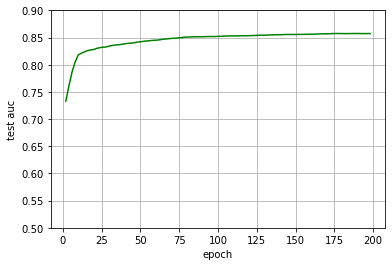

In [104]:
%pylab inline
plot([x['epoch'] for x in epoch_hist if 'test_auc' in x], [x['test_auc'] for x in epoch_hist if 'test_auc' in x])
grid()
ylim(0.5, 0.9)
xlabel('epoch')
ylabel('test auc')

In [ ]:
break_stuff

# Baseline Machine Learning Models

In [ ]:
#1. Split 
print("--------------------------------------- Splitting dataset ---------------------------------------")

#a. split into feature and target sets
# X = df.iloc[:, 1:] #features
# y = (df.iloc[:, 0:1]) #target
# print("X size:", str(X.shape))
# print("y size:", str(y.shape))

#b. 80/20 split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled.values.ravel(), test_size=0.2, random_state=seed) #.ravel will convert that array shape to (n, )
print("X training size\t| X validation size\t| y training size\t| Y validation size")
print(str(X_train.shape) + "\t  " + str(X_test.shape) + "\t\t  " + str(y_train.shape) + "\t\t   " + str(y_test.shape))

In [ ]:
print('Resampled dataset shape {}'.format(Counter(y_test)))

In [ ]:
print('Resampled dataset shape {}'.format(Counter(y_train)))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

%matplotlib inline

In [ ]:
print("---------------------------------------- Initiating Models ----------------------------------------")
# Create the models to be tested
max_features = 3
num_trees = 100
###Bagging
#1. Random forest:
modelRF =  RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

#2. Extra Trees:
modelET = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

####Boosting
#3. AdaBoost:
cart = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=3, random_state=0)
modelAB= AdaBoostClassifier(base_estimator=cart,n_estimators=num_trees, random_state=seed)

#4. XGBoost:
modelXG= xgb.XGBClassifier(random_state=seed)

print("Done")

In [ ]:
print("------------------------------------------ Performing CV ------------------------------------------")
#1. Random Forest 
cvresultsRF = cross_validate(modelRF, X_train, y_train, cv=5, n_jobs=10, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'), return_train_score=True)
#accuracy scores averaged across the five folds
print("\nRandom Forest: accuracy (standard deviation): %0.2f (%0.2f)" % (cvresultsRF['test_accuracy'].mean(), cvresultsRF['test_accuracy'].std()))
print("Random Forest: precision (standard deviation): %0.2f (%0.2f)" % (cvresultsRF['test_precision'].mean(), cvresultsRF['test_precision'].std()))
print("Random Forest: recall (standard deviation): %0.2f (%0.2f)" % (cvresultsRF['test_recall'].mean(), cvresultsRF['test_recall'].std()))
print("Random Forest: f1 (standard deviation): %0.2f (%0.2f) " % (cvresultsRF['test_f1'].mean(), cvresultsRF['test_f1'].std()))
#print("Random Forest: ROC AUC (standard deviation): %0.2f (%0.2f)" % (cvresultsRF['test_roc_auc'].mean(), cvresultsRF['test_roc_auc'].std()))

#2. Extra Trees

cvresultsET = cross_validate(modelET, X_train, y_train, cv=5, n_jobs=10, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'), return_train_score=True)
#accuracy scores averaged across the five folds
print("\nExtra Trees: accuracy: %0.2f test accuracy with a standard deviation of %0.2f" % (cvresultsET['test_accuracy'].mean(), cvresultsET['test_accuracy'].std()))
print("Extra Trees: precision (standard deviation): %0.2f (%0.2f)" % (cvresultsET['test_precision'].mean(), cvresultsET['test_precision'].std()))
print("Extra Trees: recall (standard deviation): %0.2f (%0.2f)" % (cvresultsET['test_recall'].mean(), cvresultsET['test_recall'].std()))
print("Extra Trees: f1 (standard deviation): %0.2f (%0.2f) " % (cvresultsET['test_f1'].mean(), cvresultsET['test_f1'].std()))


#3. AdaBoost
cvresultsAB = cross_validate(modelAB, X_train, y_train, cv=5, n_jobs=10, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'), return_train_score=True)
#accuracy scores averaged across the five folds
print("\nAdaBoost: accuracy: %0.2f test accuracy with a standard deviation of %0.2f" % (cvresultsAB['test_accuracy'].mean(), cvresultsAB['test_accuracy'].std()))
print("AdaBoost: precision (standard deviation): %0.2f (%0.2f)" % (cvresultsAB['test_precision'].mean(), cvresultsAB['test_precision'].std()))
print("AdaBoost: recall (standard deviation): %0.2f (%0.2f)" % (cvresultsAB['test_recall'].mean(), cvresultsAB['test_recall'].std()))
print("AdaBoost: f1 (standard deviation): %0.2f (%0.2f) " % (cvresultsAB['test_f1'].mean(), cvresultsAB['test_f1'].std()))

#4.  XG Boosting
cvresultsXG = cross_validate(modelXG, X_train, y_train, cv=5, n_jobs=10, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'), return_train_score=True)
#accuracy scores averaged across the five folds
print("\nXGBoost: accuracy: %0.2f test accuracy with a standard deviation of %0.2f" % (cvresultsXG['test_accuracy'].mean(), cvresultsXG['test_accuracy'].std()))
print("XGBoost: precision (standard deviation): %0.2f (%0.2f)" % (cvresultsXG['test_precision'].mean(), cvresultsXG['test_precision'].std()))
print("XGBoost: recall (standard deviation): %0.2f (%0.2f)" % (cvresultsXG['test_recall'].mean(), cvresultsXG['test_recall'].std()))
print("XGBoost: f1 (standard deviation): %0.2f (%0.2f) " % (cvresultsXG['test_f1'].mean(), cvresultsXG['test_f1'].std()))



In [ ]:
print("-------------------------- Performing Randomized Grid Search for Random Forest ---------------------------------")
paramsRF = {"n_estimators": [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
            "max_features": ['auto', 'sqrt', 'log2', None],
#           “max_depth”: [int(x) for x in np.linspace(10, 110, num = 11)],
            "max_depth": [5, 10, 15, 20, None],
#           “min_samples_split”: [5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False] }

search_rf = RandomizedSearchCV(modelRF, param_distributions=paramsRF, random_state=seed, cv=5, n_iter=100, verbose=1, n_jobs=3, return_train_score=True,
                                    scoring = ['accuracy'], refit='accuracy')
search_rf.fit(X_train, y_train)
result_rf = pd.DataFrame(search_rf.cv_results_)
print("\nBest parameter options:", search_rf.estimator.get_params().keys())
rf_best_params = search_rf.best_estimator_
print("\nRandom Forest best params:", rf_best_params)

In [ ]:
print("------------------------------Performing Randomized GridSearch for  Extra Trees --------------------------------")
paramsET =  {'n_estimators': [10, 50, 100, 300],
        'max_features': ['auto', 'log2', None],
        'min_samples_leaf': [4,5,6,7,8,9,10],
        'min_samples_split': [5, 10, .03, .05, .10]
}

search_et = RandomizedSearchCV(modelET, param_distributions=paramsET, random_state=seed, cv=5, n_iter=20, verbose=1, n_jobs=3, return_train_score=True,
                                    scoring = ['accuracy'], refit='accuracy')
search_et.fit(X_train, y_train)
result_et = pd.DataFrame(search_et.cv_results_)
print("\nBest parameter options:", search_et.estimator.get_params().keys())
et_best_params = search_et.best_estimator_
print("\nExtra Trees best params:", et_best_params)

In [ ]:
print("------------------------------Performing Randomized GridSearch for AdaBoost --------------------------------")
paramsAB = param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
        'n_estimators': np.arange(10,300,10),
         'learning_rate': [0.01, 0.05, 0.1, 1]
            
             }        
                        
search_ab = RandomizedSearchCV(estimator=modelAB, param_distributions=paramsAB, random_state=seed, cv=5, n_iter=20, verbose=1, n_jobs=3, return_train_score=True,
                                    scoring = ['accuracy'], refit='accuracy')
search_ab.fit(X_train, y_train)
result_ab = pd.DataFrame(search_ab.cv_results_)
print("\nBest parameter options:", search_ab.estimator.get_params().keys())
ab_best_params = search_ab.best_estimator_
print("\nAdaBoost best params:", ab_best_params)

In [ ]:
print("------------------------------Performing Randomized GridSearch for  XGBoost --------------------------------")
paramsXG = {"tree_method": ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
            "n_estimators": [50,100,150, 200, 300],
            "gamma": [0.0,0.1,0.2,0.3,0.4],
            "learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
            "max_depth": [1,2,3,4,5,6,8,10]}
search_xgboost = RandomizedSearchCV(modelXG, param_distributions=paramsXG, random_state=seed, cv=5, n_iter=100, verbose=1, n_jobs=3, return_train_score=True,
                                    scoring = ['accuracy'], refit='accuracy')
search_xgboost.fit(X_train, y_train)
result_xgboost = pd.DataFrame(search_xgboost.cv_results_)
print("\nBest parameter options:", search_xgboost.estimator.get_params().keys())
xgb_best_params = search_xgboost.best_estimator_
print("\nXGBoost best params:", xgb_best_params)

In [ ]:
print("------------------------------Retraining Models --------------------------------")
# Retrain using optimised params on 80%


# Retraining of training data using optimized Random Forest params
print("\n------------------------------Random Forest--------------------------------")
modelRF_optimized = rf_best_params
modelRF_final = modelRF_optimized.fit(X_train, y_train)
training_scoreRF = modelRF_optimized.score(X_train, y_train)
print("Training score optimised: ", training_scoreRF)
print("\nmodelRF_optimized: ", modelRF_optimized)
print("\nmodelRF_optimized_final: ", modelRF_final)



#Retraining of training data using optimized Extra Trees params
print("------------------------------Extra Trees--------------------------------")
modelET_optimized = et_best_params
modelET_final = modelET_optimized.fit(X_train, y_train)
training_scoreET = modelET_optimized.score(X_train, y_train)
print("Training score optimised: ", training_scoreET)
print("\nmodelET_optimized: ", modelET_optimized)
print("\nmodelET_optimized_final: ", modelET_final)



# Retraining of training data using optimized AdaBoost params
print("\n------------------------------AdaBoost--------------------------------")
modelAB_optimized = ab_best_params
modelAB_final = modelAB_optimized.fit(X_train, y_train)
training_scoreAB = modelAB_optimized.score(X_train, y_train)
print("Training score optimised: ", training_scoreAB)
print("\nmodelAB_optimized: ", modelAB_optimized)
print("\nmodelAB_optimized_final: ", modelAB_final)

# Retraining of training data using optimized XGBoost params
print("\n------------------------------XGBoost--------------------------------")
modelXG_optimized = xgb_best_params
modelXG_final = modelXG_optimized.fit(X_train, y_train)
training_scoreXG = modelXG_optimized.score(X_train, y_train)
print("Training score optimised: ", training_scoreXG)
print("\nmodelXG_optimized: ", modelXG_optimized)
print("\nmodelXG_optimized_final: ", modelXG_final)



In [ ]:
print("------------------------------ Testing --------------------------------")
# Test using optimised models
#1.
predsRF = modelRF_final.predict(X_test)
print("\nRandom Forest predictions: ", predsRF)
# y_test['preds'] = predsRF


#2. 
predsET = modelET_final.predict(X_test)
print("\nExtra Trees predictions: ", predsET)

#3.
predsAB = modelAB_final.predict(X_test)
print("\nAdaBoost predictions: ", predsAB)
#4.
predsXG = modelXG_final.predict(X_test)
print("\nXGBoost predictions: ", predsXG)

In [ ]:
print("------------------------ Calculating CI for Random Forest --------------------------------")
#bootstrap
#removed weighted avg metrics because we don't have a very large class imbalance.
true_pred_RF = pd.DataFrame([y_test, predsRF], index=['true', 'pred']) 
true_pred_RF = true_pred_RF.transpose()
 
n =  len(true_pred_RF)
stats = []
# per_class_f1 = []
# per_class_precision = []
# per_class_recall = []
n_bootstrap = 10000
for i in range(n_bootstrap):
    samp = true_pred_RF.sample(n, replace=True)
    
    stats.append([accuracy_score(samp.iloc[:,0], samp.iloc[:,1]), precision_score(samp.iloc[:,0], samp.iloc[:,1]),
    recall_score(samp.iloc[:,0], samp.iloc[:,1]), f1_score(samp.iloc[:,0], samp.iloc[:,1])])
    
flatten_statsRF = np.array(stats)
flatten_stats_dfRF = pd.DataFrame(flatten_statsRF, columns = ['accuracy', 'precision', 'recall', 'f1_score'])
#flatten_stats_dfRF.to_csv('./RF_ConfidenceInt_results.csv')

np.mean(flatten_statsRF, axis=0)
np.percentile(a = flatten_statsRF, q = 2.5, axis = 0)
np.percentile(a = flatten_statsRF, q = 97.5, axis = 0)

plt.hist(flatten_statsRF[:,3])

resultsRF = pd.DataFrame([np.mean(flatten_statsRF, axis=0), np.percentile(a = flatten_statsRF, q = 2.5, axis = 0),np.percentile(a = flatten_statsRF, q = 97.5, axis = 0) ],
              index = ['average', 'lower CI', 'Upper CI'], columns = ['accuracy', 'precision', 'recall', 'f1_score'])
resultsRF

In [ ]:
print("------------------------ Calculating CI for Extra Tree --------------------------------")
#bootstrap
#removed weighted avg metrics because we don't have a very large class imbalance.
true_pred_ET = pd.DataFrame([y_test, predsET], index=['true', 'pred']) 
true_pred_ET = true_pred_ET.transpose()
 
n =  len(true_pred_ET)
stats = []
n_bootstrap = 10000
for i in range(n_bootstrap):
    samp = true_pred_ET.sample(n, replace=True)
    
    stats.append([accuracy_score(samp.iloc[:,0], samp.iloc[:,1]), precision_score(samp.iloc[:,0], samp.iloc[:,1]),
    recall_score(samp.iloc[:,0], samp.iloc[:,1]), f1_score(samp.iloc[:,0], samp.iloc[:,1])])
    
flatten_statsET = np.array(stats)
flatten_stats_dfET = pd.DataFrame(flatten_statsET, columns = ['accuracy', 'precision', 'recall', 'f1_score'])
#flatten_stats_dfDT.to_csv('./DT_ConfidenceInt_results.csv')

np.mean(flatten_statsET, axis=0)
np.percentile(a = flatten_statsET, q = 2.5, axis = 0)
np.percentile(a = flatten_statsET, q = 97.5, axis = 0)

plt.hist(flatten_statsET[:,3])

resultsET = pd.DataFrame([np.mean(flatten_statsET, axis=0), np.percentile(a = flatten_statsET, q = 2.5, axis = 0),np.percentile(a = flatten_statsET, q = 97.5, axis = 0) ],
              index = ['average', 'lower CI', 'Upper CI'], columns = ['accuracy', 'precision', 'recall', 'f1_score'])
resultsET

In [ ]:
print("------------------------ Calculating CI for Adaboost --------------------------------")
#bootstrap
#removed weighted avg metrics because we don't have a very large class imbalance.
true_pred_AB = pd.DataFrame([y_test, predsAB], index=['true', 'pred']) 
true_pred_AB = true_pred_AB.transpose()
 
n =  len(true_pred_AB)
stats = []

n_bootstrap = 10000
for i in range(n_bootstrap):
    samp = true_pred_AB.sample(n, replace=True)
    
    stats.append([accuracy_score(samp.iloc[:,0], samp.iloc[:,1]), precision_score(samp.iloc[:,0], samp.iloc[:,1]),
    recall_score(samp.iloc[:,0], samp.iloc[:,1]), f1_score(samp.iloc[:,0], samp.iloc[:,1])])
    
flatten_statsAB = np.array(stats)
flatten_stats_dfAB = pd.DataFrame(flatten_statsAB, columns = ['accuracy', 'precision', 'recall', 'f1_score'])
#flatten_stats_dfDT.to_csv('./DT_ConfidenceInt_results.csv')

np.mean(flatten_statsAB, axis=0)
np.percentile(a = flatten_statsAB, q = 2.5, axis = 0)
np.percentile(a = flatten_statsAB, q = 97.5, axis = 0)

plt.hist(flatten_statsAB[:,3])

resultsAB = pd.DataFrame([np.mean(flatten_statsAB, axis=0), np.percentile(a = flatten_statsAB, q = 2.5, axis = 0),np.percentile(a = flatten_statsAB, q = 97.5, axis = 0) ],
              index = ['average', 'lower CI', 'Upper CI'], columns = ['accuracy', 'precision', 'recall', 'f1_score'])
resultsAB

In [ ]:
print("------------------------ Calculating CI for XGBoost --------------------------------")
#bootstrap
#removed weighted avg metrics because we don't have a very large class imbalance.
true_pred_XG = pd.DataFrame([y_test, predsXG], index=['true', 'pred']) 
true_pred_XG = true_pred_XG.transpose()
 
n =  len(true_pred_XG) #all samples
stats = []
n_bootstrap = 10000
for i in range(n_bootstrap):
    samp = true_pred_XG.sample(n, replace=True)
    
    stats.append([accuracy_score(samp.iloc[:,0], samp.iloc[:,1]), precision_score(samp.iloc[:,0], samp.iloc[:,1]),
    recall_score(samp.iloc[:,0], samp.iloc[:,1]), f1_score(samp.iloc[:,0], samp.iloc[:,1])])
    
flatten_statsXG = np.array(stats)
flatten_stats_dfXG = pd.DataFrame(flatten_statsXG, columns = ['accuracy', 'precision', 'recall', 'f1_score'])
#flatten_stats_dfXG.to_csv('./XG_ConfidenceInt_results.csv')

np.mean(flatten_statsXG, axis=0)
#confidence interval of 95%
np.percentile(a = flatten_statsXG, q = 2.5, axis = 0) #lower bound
np.percentile(a = flatten_statsXG, q = 97.5, axis = 0) #upper bound

plt.hist(flatten_statsXG[:,3])

resultsXG = pd.DataFrame([np.mean(flatten_statsXG, axis=0), np.percentile(a = flatten_statsXG, q = 2.5, axis = 0),np.percentile(a = flatten_statsXG, q = 97.5, axis = 0) ],
              index = ['average', 'lower CI', 'Upper CI'], columns = ['accuracy', 'precision', 'recall', 'f1_score'])
resultsXG

In [ ]:
print("------------------------------ Generating Confusion Matrices --------------------------------")

# Confusion matrix for test set results, acc, prec, recall, f1, imp features 

print("\n------------------------------ CM for Random Forest --------------------------------")
modelRF_optimized.fit(X_train, y_train)
predsRF = modelRF_optimized.predict(X_test)
scoreRF = modelRF_optimized.score(X_test, y_test)

cmRF = confusion_matrix(y_test, predsRF)
print(cmRF)



print("------------------------------ CM for Extra Tree --------------------------------")
modelET_optimized.fit(X_train, y_train)
predsET = modelET_optimized.predict(X_test)
scoreET = modelET_optimized.score(X_test, y_test)
cmET = confusion_matrix(y_test, predsET)
print(cmET)


print("------------------------------ CM for AdaBoost --------------------------------")
modelAB_optimized.fit(X_train, y_train)
predsAB = modelAB_optimized.predict(X_test)
scoreAB = modelAB_optimized.score(X_test, y_test)
cmAB = confusion_matrix(y_test, predsAB)
print(cmAB)




print("\n------------------------------ CM for XGBoost --------------------------------")
modelXG_optimized.fit(X_train, y_train)
predsXG = modelXG_optimized.predict(X_test)
scoreXG = modelXG_optimized.score(X_test, y_test)
#print(scoreXG)
cmXG = confusion_matrix(y_test, predsXG)
print(cmXG)

In [ ]:
print("------------------------------ Generating multi-plot for Confusion Matrices --------------------------------")

#create a figure instance and side-by-side subplots 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,10))

#plt.subplots_adjust(left=0.1, right=2.2, bottom=0.1, top=0.6, wspace=0.2, hspace=0.1) #spacing between subplots

#use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(cmRF, ax=axes[0,0], fmt = '.0f',annot=True,square=True, cmap='Blues_r', xticklabels=['Cured', 'Not Cured'], yticklabels=['Cured', 'Not Cured'], annot_kws={"weight": "bold"})
sns.heatmap(cmET, ax=axes[0,1], fmt = '.0f',annot=True,square=True, cmap='Blues_r', xticklabels=['Cured', 'Not Cured'], yticklabels=['Cured', 'Not Cured'], annot_kws={"weight": "bold"})

sns.heatmap(cmAB, ax=axes[1,0], fmt = '.0f',annot=True, square=True, cmap='Blues_r', xticklabels=['Cured', 'Not Cured'], yticklabels=['Cured', 'Not Cured'], annot_kws={"weight": "bold"})
sns.heatmap(cmXG, ax=axes[1,1], fmt = '.0f',annot=True,square=True, cmap='Blues_r', xticklabels=['Cured', 'Not Cured'], yticklabels=['Cured', 'Not Curedt'], annot_kws={"weight": "bold"})


# #rotating the xticklabels
# plt.setp(ax1.get_xticklabels(), rotation='horizontal')
# plt.setp(ax2.get_xticklabels(), rotation='horizontal')
# plt.setp(ax3.get_xticklabels(), rotation='horizontal')
# plt.setp(ax4.get_xticklabels(), rotation='horizontal')

# #rotating the yticklabels
# plt.setp(ax1.get_yticklabels(), rotation='vertical', va="center")
# plt.setp(ax2.get_yticklabels(), rotation='vertical', va="center")
# plt.setp(ax3.get_yticklabels(), rotation='vertical', va="center")
# plt.setp(ax4.get_yticklabels(), rotation='vertical', va="center")

# #set labels
# ax1.set(xlabel="Predicted label", ylabel="Actual label")
# ax2.set(xlabel="Predicted label", ylabel="Actual label")
# ax3.set(xlabel="Predicted label", ylabel="Actual label")
# ax4.set(xlabel="Predicted label", ylabel="Actual label")




# #set captions
ax=axes[0,0].text(0.006, 0, ("A"), wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')
ax=axes[0,1].text(0, 0, ("B"), wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')
ax=axes[1,0].text(0,2.28, ("C"), wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')
ax=axes[1,1].text(0, 2.28, ("D"), wrap=True, horizontalalignment='center', fontsize=12, fontweight='bold')

# #fig.suptitle('Confusion Matrices for Dinucleotide Model Testing')

plt.show()
fig.savefig("./Conf_matrices.eps", format='eps')

In [ ]:
# Feature Importance 
def important_features(importance_values):
    scores_df = pd.DataFrame(importance_values)
    features_df = pd.DataFrame(X_resampled.columns)
    #concat two dataframes for better visualization
    features_scores_df = pd.concat([features_df, scores_df], axis=1)
    features_scores_df.columns = ["Feature", "Score"]
    #print("All The Features\n", features_scores_df)
    print("10 Best Features (in descending order)\n", features_scores_df.nlargest(10, "Score"))
    #plot graph of feature importances for better visualization
    sns.set_palette(sns.color_palette(["blue"]))
    feat_importances = pd.Series(importance_values, index=X_resampled.columns)
    feat_importances.nlargest(10).plot(kind="bar")
    plt.show()

In [ ]:
print("------------------------------ Important Features for Random Forest Model --------------------------------")
important_features(modelRF_optimized.feature_importances_)

In [ ]:
print("------------------------------ Important Features for Extra Tree Model --------------------------------")
important_features(modelET_optimized.feature_importances_)

In [ ]:
print("------------------------------ Important Features for AdaBoost Model --------------------------------")
important_features(modelAB_optimized.feature_importances_)

In [ ]:
print("------------------------------ Important Features for XGBoost Model --------------------------------")
important_features(modelXG_optimized.feature_importances_)